In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

# Data Cleaning and Exploration

In [60]:
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [61]:
# dropping the 15 missing values
print(data.isnull().sum())
print(f'\nTotal number of missing values: {data.isnull().sum().sum()}')

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Total number of missing values: 15


In [62]:
data = data.dropna()
data = data.drop(labels=['track_id','track_album_id','playlist_id'], axis=1)
print(data.isnull().sum())
print(f'\nTotal number of missing values: {data.isnull().sum().sum()}')

track_name                  0
track_artist                0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Total number of missing values: 0


In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
columns_to_normalize = ['loudness','key','tempo','duration_ms']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.918090,1,0.0583,0.1020,0.000000,0.0653,0.518,0.509673,0.371254
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.869162,1,0.0373,0.0724,0.004210,0.3570,0.693,0.417524,0.308674
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.901368,0,0.0742,0.0794,0.000023,0.1100,0.613,0.517908,0.335953
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.894118,1,0.1020,0.0287,0.000009,0.2040,0.277,0.509338,0.321311
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.875385,1,0.0359,0.0803,0.000000,0.0833,0.725,0.517775,0.360156


In [64]:
genre_groups = data.groupby('playlist_genre')
print(genre_groups.size())

playlist_genre
edm      6043
latin    5153
pop      5507
r&b      5431
rap      5743
rock     4951
dtype: int64


## Data Visualization

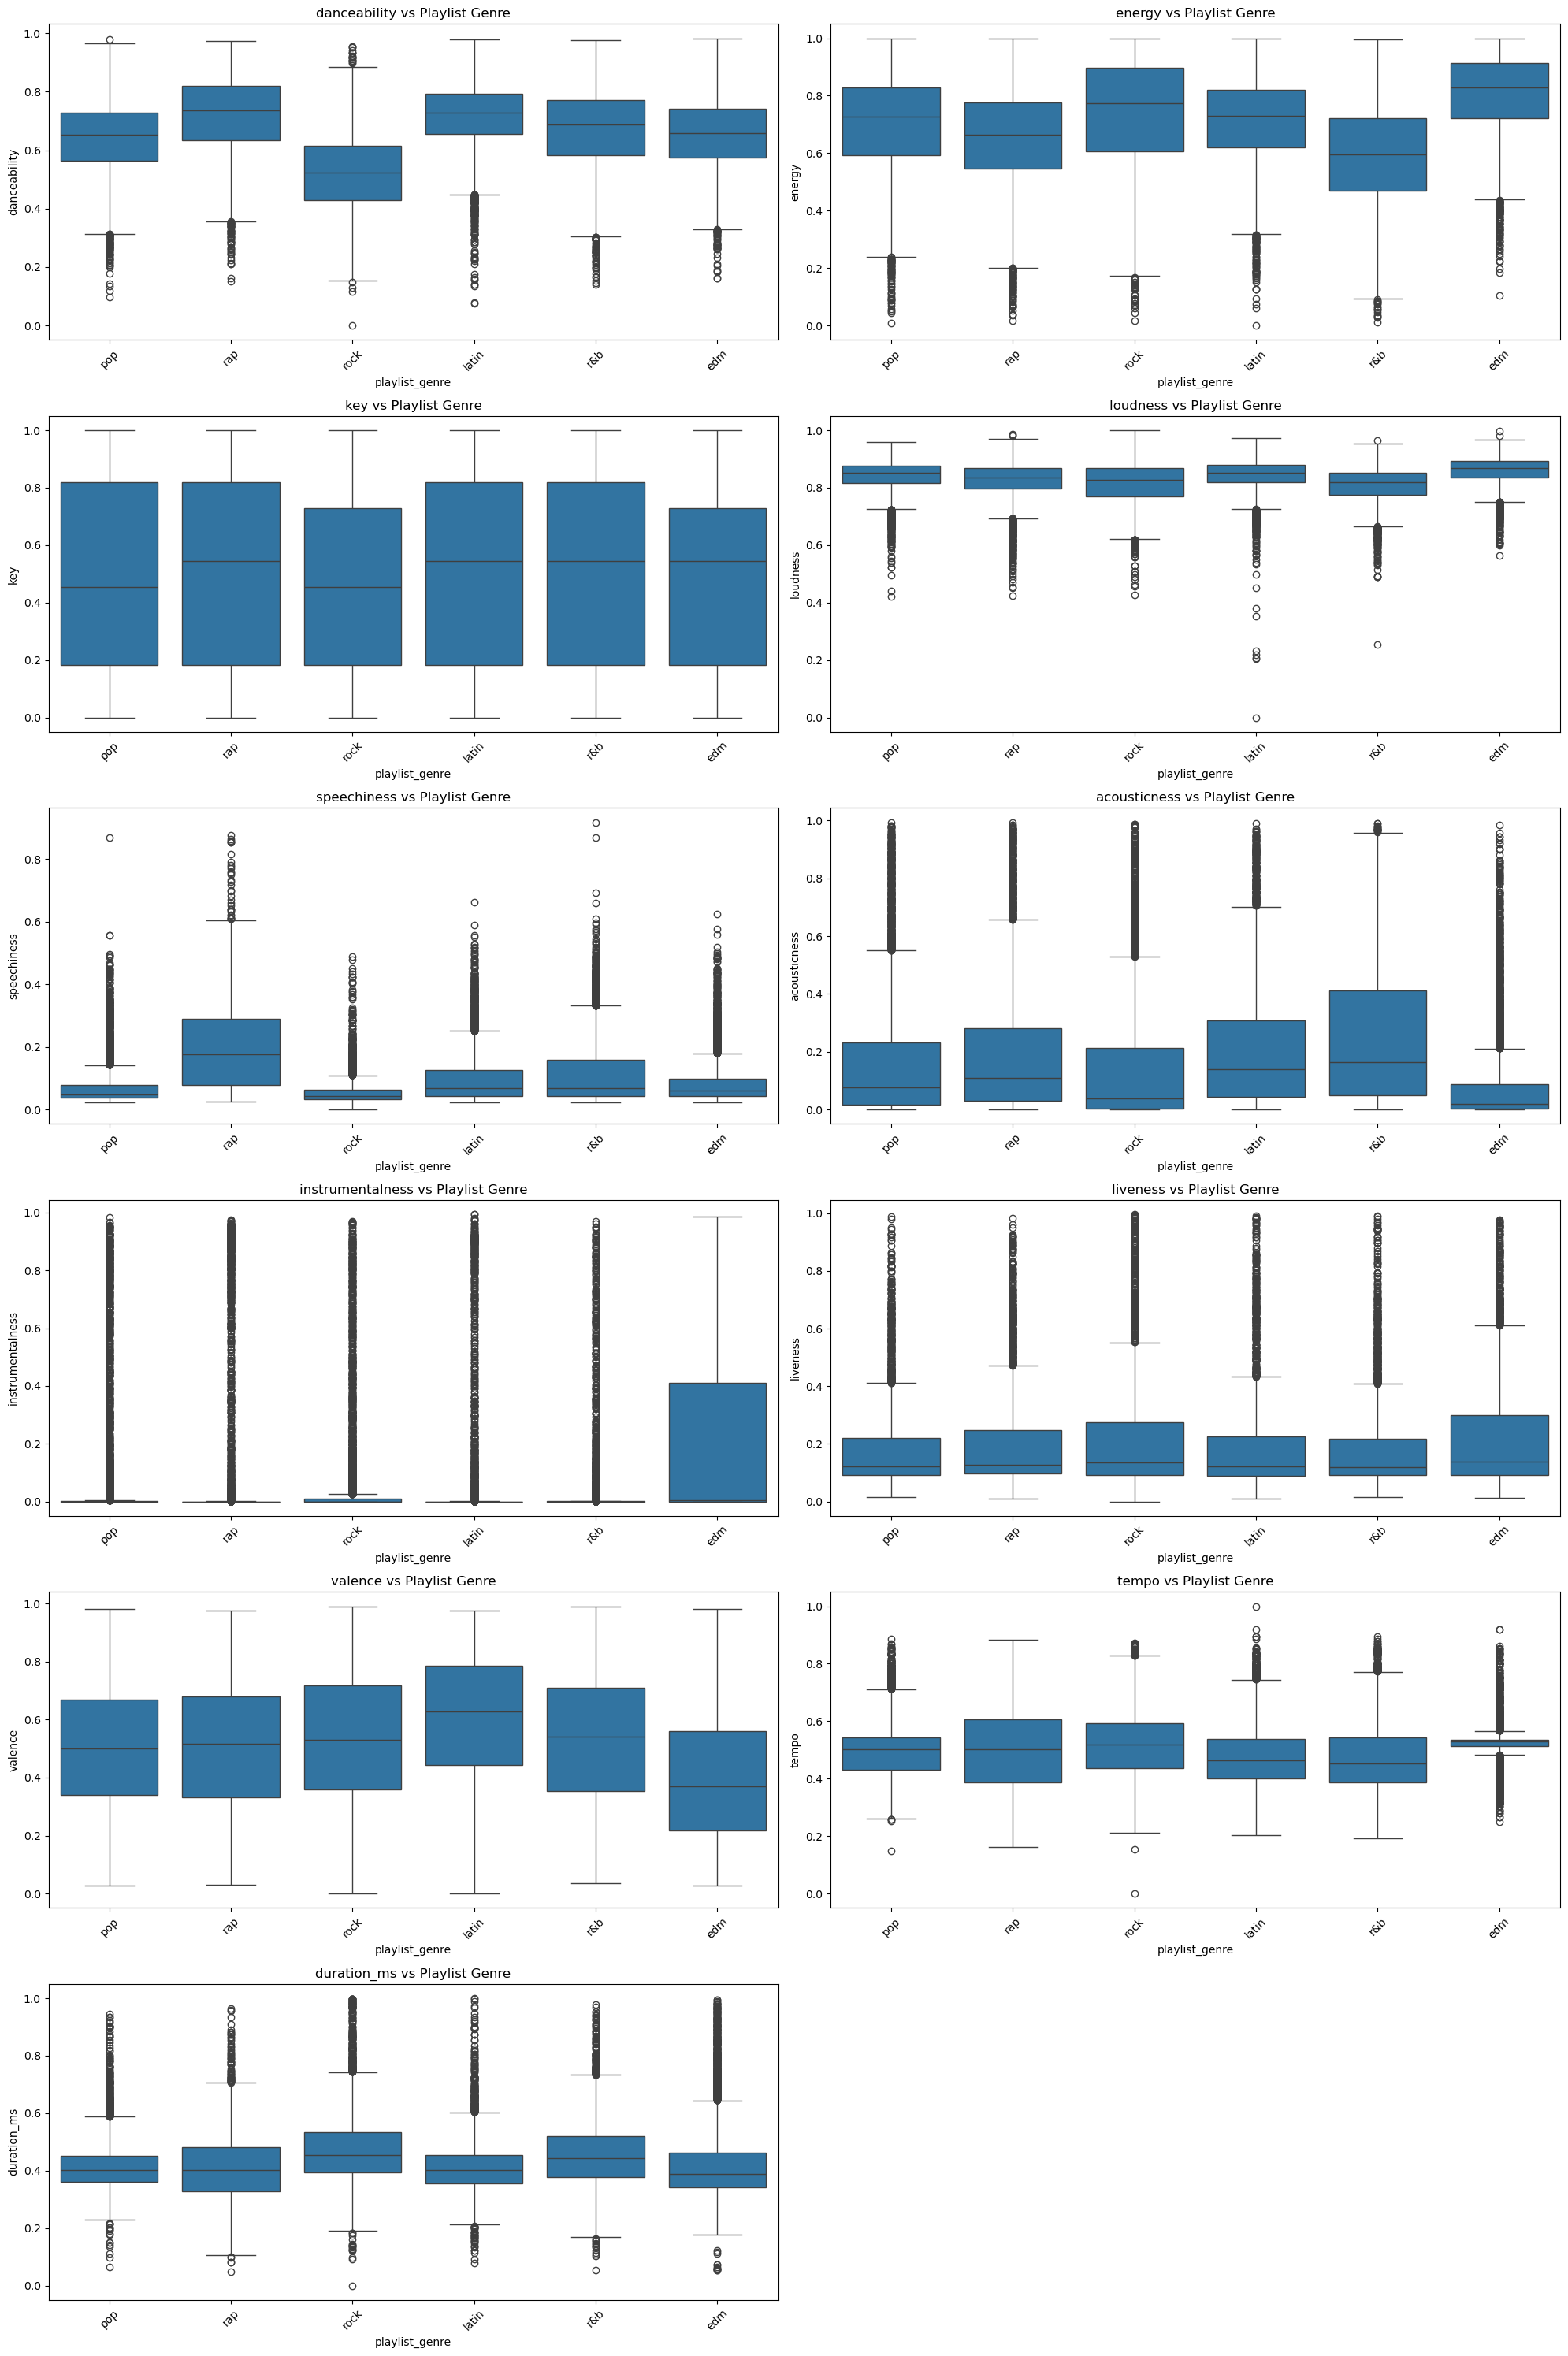

In [65]:
import seaborn as sns

features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

plt.figure(figsize=(20, 30))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='playlist_genre', y=feature, data=data)
    plt.title(f'{feature} vs Playlist Genre')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [66]:

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

valid_features = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']
X = data[valid_features]
Y = data['playlist_genre']

# KNN with Nested Cross Validation
knn = KNeighborsClassifier(n_jobs=-1)

# Setting up the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', knn)
])

# Parameter grid for KNN
grid_params = {'knn__n_neighbors': range(1, 31)}

# Outer cross-validation loop
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, cv=inner_cv, scoring='accuracy')

# Nested cross-validation
nested_scores_knn = cross_val_score(grid_search, X, Y, cv=outer_cv)

print(f'Nested CV Accuracy Scores for KNN: {nested_scores_knn}')
print(f'Mean Nested CV Accuracy for KNN: {nested_scores_knn.mean()}')

Nested CV Accuracy Scores for KNN: [0.49543101 0.49345111 0.49147122 0.4883473  0.49291698]
Mean Nested CV Accuracy for KNN: 0.49232352312763555


In [67]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes with Nested Cross Validation
nb = GaussianNB()

# Setting up the pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', nb)
])

# Nested cross-validation for Naive Bayes
nested_scores_nb = cross_val_score(pipeline_nb, X, Y, cv=outer_cv)

print(f'Nested CV Accuracy Scores for Naive Bayes: {nested_scores_nb}')
print(f'Mean Nested CV Accuracy for Naive Bayes: {nested_scores_nb.mean()}')

Nested CV Accuracy Scores for Naive Bayes: [0.43070362 0.42217484 0.42552543 0.43031226 0.44234577]
Mean Nested CV Accuracy for Naive Bayes: 0.4302123867814509


In [69]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
# SVM with Nested Cross Validation
svm = SVC()
pca = PCA()

# Setting up the pipeline for SVM
pipeline_svm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('svm', svm)
])

# Parameter grid for SVM
grid_params_svm = {'pca__n_components': list(range(5, 19)),
                   'svm__kernel': ['linear', 'rbf', 'poly']}

grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=grid_params_svm, cv=inner_cv, scoring='accuracy')

# Nested cross-validation for SVM
nested_scores_svm = cross_val_score(grid_search_svm, X, Y, cv=outer_cv)

print(f'Nested CV Accuracy Scores for SVM: {nested_scores_svm}')
print(f'Mean Nested CV Accuracy for SVM: {nested_scores_svm.mean()}')


c:\Users\liqiy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\liqiy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\liqiy\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\liqiy\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, ro

Nested CV Accuracy Scores for SVM: [0.50929028 0.50502589 0.4989339  0.50662605 0.50906321]
Mean Nested CV Accuracy for SVM: 0.5057878674767358
